*1.Programs on feedforward network to classify any standard dataset available in the 
public domain*

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

Load Data

In [ ]:
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

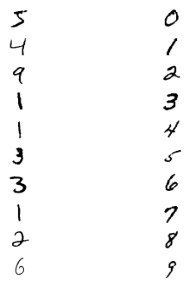

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys')
  plt.axis('off')
plt.show()

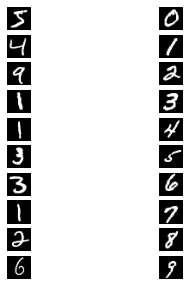

In [ ]:
plt.figure(figsize=(5,5))
for k in range(20):
  plt.subplot(10,2,k+1)
  plt.imshow(x_train[k],cmap='Greys_r')
  plt.axis('off')
plt.show()

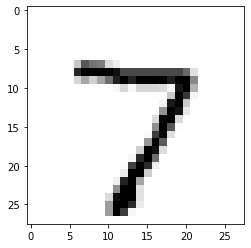

In [ ]:
plt.imshow(x_valid[0],cmap='Greys')

In [ ]:
x_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Preprocess Data

In [ ]:
x_train=x_train.reshape(60000,784).astype('float32')
x_valid=x_valid.reshape(10000,784).astype('float32')

In [ ]:
x_train/=225
x_valid/=225

In [ ]:
x_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
n_classes=10
y_train=keras.utils.np_utils.to_categorical(y_train,n_classes)
y_valid=keras.utils.np_utils.to_categorical(y_valid,n_classes)

In [ ]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
(64*784)

50176

In [ ]:
(64*784)+64

50240

In [ ]:
(1064)+10+(64784)+64

65922

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, batch_size=128, epochs=70, verbose=1)

Epoch 1/70
469/469 [==============================] - 2s 3ms/step - loss: 0.0914 - accuracy: 0.1494
Epoch 2/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.1734
Epoch 3/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.1940
Epoch 4/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.2078
Epoch 5/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.2171
Epoch 6/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.2254
Epoch 7/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.2392
Epoch 8/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.2559
Epoch 9/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0873 - accuracy: 0.2732
Epoch 10/70
469/469 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.2913

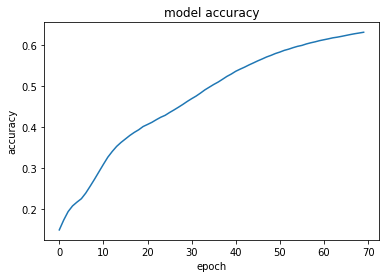

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

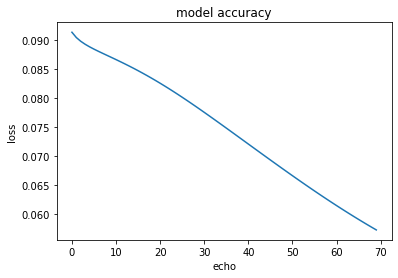

In [ ]:
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('echo')
plt.show()